<h1>Reddit Scraped Comments</h1>

<h3>Installation and import of libraries</h3>

In [2]:
folder_path = "../Reddit_Scraped_Comments/"
output_folder_path = "./visuals/"
file1 = "anti_lockdown_comments.csv"
file2 = "corona_lockdown_comments.csv"
file3 = "covid19_lockdown_comments.csv"

In [3]:
!pip install pyLDAvis

In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import nltk
nltk.download('stopwords') #download if don't have yet
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Viewing Data</h3>

In [5]:
anti_lockdown_comments_df = pd.read_csv(folder_path + file1)
anti_lockdown_comments_df

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,schu4KSU,People like this everywhere in the world. Dif...,1
1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,StupidizeMe,"Well, there's certainly enough of them to caus...",0
2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Eltharion-the-Grim,They are largely absent from Asia. The only pl...,0
3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Thisam,"Yup, the percentage of population who are easi...",0
4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,Short answer: Yes. Look at the USA and how Bre...,0
...,...,...,...,...,...,...,...,...,...,...,...
1516,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,BigDaddyCoolDeisel,Is there any fucking question anymore?,1
1517,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,NaN,[removed],1
1518,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,AutoModerator,Your comment has been removed because\n\n* **P...,0
1519,0,gl3pgs,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,48,1.589668e+09,2020-05-17 06:27:03,Tysk_Kille,Fake news,1


In [6]:
corona_lockdown_comments_df = pd.read_csv(folder_path + file2)
corona_lockdown_comments_df

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,NaN,[deleted],1
1,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,NaN,[removed],0
2,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,lyrkyr12345,Joe Arpaio is human garbage,0
3,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,Latexfrog,Paul Penzone. I had the great fortune of going...,0
4,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,Basslineblues,"Unfortunately, Joe Arpaio is running for sheri...",0
...,...,...,...,...,...,...,...,...,...,...,...
9759,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,plentyoffishes,"Won't work, just like the first one didn't work.",1
9760,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,BadTiger85,I would expect the same kind of unrest in Fran...,1
9761,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,GEM592,Riots in 3 ... 2 ...,1
9762,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,VagnerLove,Where was all the bloody prep that we were mea...,1


In [7]:
covid19_lockdown_comments_df = pd.read_csv(folder_path + file3)
covid19_lockdown_comments_df

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,I wish we had an understanding of where the ma...,1
1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,> Is it overly family spread?\n\nI believe the...,0
2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0
3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0
4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,In my neighborhood people started throwing par...,0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,McGloin_the_GOAT,This is an economic analysis and in economics ...,0
886,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,Zamaamiro,This sub seems to be attracting more and more ...,1
887,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,NaN,"I wouldn't say that's true here. This sub, lik...",0
888,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,jphamlore,Fortunately there is another model from IHME t...,1


<h3>Cleaning Data</h3>

In [12]:
# Drop columns with removed comments
anti_lockdown_comments_df = anti_lockdown_comments_df[anti_lockdown_comments_df.comment != "[removed]"]
corona_lockdown_comments_df = corona_lockdown_comments_df[corona_lockdown_comments_df.comment != "[removed]"]
covid19_lockdown_comments_df = covid19_lockdown_comments_df[covid19_lockdown_comments_df.comment != "[removed]"]

In [13]:
list1 = anti_lockdown_comments_df["comment"].tolist()
list2 = corona_lockdown_comments_df["comment"].tolist()
list3 = covid19_lockdown_comments_df["comment"].tolist()
comments = list1 + list2 + list3

# Length of texts / documents
print(len(comments))

# Sample texts
print(comments[0])
print(comments[1])

11581
People like this everywhere in the world.  Difference is, are there enough to gain political power?
Well, there's certainly enough of them to cause a massive surge in COVID-19 cases and deaths, and to take some of us with them.


In [14]:
def remove_special_chars(text):
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    return re.sub(remove_chars, ' ', text)

def remove_digit_strings(text):
    return re.sub(r'\d+', '', text)

def remove_links(text):
    return re.sub(r'http\S+', '', text)

def clean_text(text):
    result_text = remove_links(text)
    result_text = remove_digit_strings(result_text)
    result_text = remove_special_chars(result_text)
    result_text = result_text.lower()
    return result_text

In [15]:
for i in range(len(comments)):
    comments[i] = clean_text(comments[i])

In [16]:
print(comments[0])
print(comments[1])

people like this everywhere in the world   difference is  are there enough to gain political power 
well  there s certainly enough of them to cause a massive surge in covid  cases and deaths  and to take some of us with them 


<h3>Tokenizing Data</h3>

In [17]:
# Stopwords
stop_words = stopwords.words('english')
exclude_words = stop_words

#exclude common words 
exclude_words_extra = ["covid","lockdown","corona","pandemic","let","im","ive","would","one","also","to","say","day","well","month","thing","take","see","get","go"]

exclude_words.extend(exclude_words_extra)

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(comments))

In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['people', 'like', 'this', 'everywhere', 'in', 'the', 'world', 'difference', 'is', 'are', 'there', 'enough', 'to', 'gain', 'political', 'power']


In [20]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in exclude_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['people', 'everywhere', 'world', 'difference', 'enough', 'gain', 'political', 'power']]


In [22]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


[[('difference', 1),
  ('enough', 1),
  ('everywhere', 1),
  ('gain', 1),
  ('people', 1),
  ('political', 1),
  ('power', 1),
  ('world', 1)]]

<h3>LDA Model</h3>

In [23]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

# supporting function 2
def compute_perplexity_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    perplexity_score = lda_model.log_perplexity(corpus_sets[i])
    
    return perplexity_score

In [24]:
# Build LDA model
num_topics = 4
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"comment" + 0.024*"question" + 0.022*"lock" + 0.022*"post" + '
  '0.021*"enough" + 0.020*"base" + 0.020*"risk" + 0.018*"allow" + '
  '0.016*"source" + 0.016*"cost"'),
 (1,
  '0.029*"death" + 0.018*"population" + 0.016*"year" + 0.014*"come" + '
  '0.011*"long" + 0.011*"hospital" + 0.010*"end" + 0.010*"see" + 0.009*"model" '
  '+ 0.009*"economy"'),
 (2,
  '0.023*"virus" + 0.023*"case" + 0.020*"country" + 0.016*"vaccine" + '
  '0.015*"lockdown" + 0.014*"spread" + 0.011*"variant" + 0.011*"measure" + '
  '0.011*"month" + 0.011*"point"'),
 (3,
  '0.036*"people" + 0.013*"time" + 0.013*"think" + 0.012*"go" + 0.012*"make" + '
  '0.011*"work" + 0.011*"need" + 0.011*"even" + 0.010*"still" + 0.009*"know"')]


In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.8784715829884995

Coherence Score:  0.6165667120922931


In [27]:
optimal_model = lda_model
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.027*"comment" + 0.024*"question" + 0.022*"lock" + 0.022*"post" + '
  '0.021*"enough" + 0.020*"base" + 0.020*"risk" + 0.018*"allow" + '
  '0.016*"source" + 0.016*"cost"'),
 (1,
  '0.029*"death" + 0.018*"population" + 0.016*"year" + 0.014*"come" + '
  '0.011*"long" + 0.011*"hospital" + 0.010*"end" + 0.010*"see" + 0.009*"model" '
  '+ 0.009*"economy"'),
 (2,
  '0.023*"virus" + 0.023*"case" + 0.020*"country" + 0.016*"vaccine" + '
  '0.015*"lockdown" + 0.014*"spread" + 0.011*"variant" + 0.011*"measure" + '
  '0.011*"month" + 0.011*"point"'),
 (3,
  '0.036*"people" + 0.013*"time" + 0.013*"think" + 0.012*"go" + 0.012*"make" + '
  '0.011*"work" + 0.011*"need" + 0.011*"even" + 0.010*"still" + 0.009*"know"')]


In [28]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [29]:
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(4):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(lda_model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:5]]
    print

term                 frequency

Topic 0 |---------------------

comment              0.027
question             0.024
lock                 0.022
post                 0.022
enough               0.021
base                 0.020
risk                 0.020
allow                0.018
source               0.016
cost                 0.016
Topic 1 |---------------------

death                0.029
population           0.018
year                 0.016
come                 0.014
long                 0.011
hospital             0.011
end                  0.010
see                  0.010
model                0.009
economy              0.009
Topic 2 |---------------------

virus                0.023
case                 0.023
country              0.020
vaccine              0.016
lockdown             0.015
spread               0.014
variant              0.011
measure              0.011
month                0.011
point                0.011
Topic 3 |---------------------

people               0.036
tim

<h1>Dominant Topic</h1>

In [30]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3388,"people, time, think, go, make, work, need, eve...","[people, everywhere, world, difference, enough..."
1,1,2.0,0.3145,"virus, case, country, vaccine, lockdown, sprea...","[certainly, enough, cause, massive, surge, cas..."
2,2,3.0,0.4400,"people, time, think, go, make, work, need, eve...","[largely, absent, read, small, group, largely,..."
3,3,3.0,0.4093,"people, time, think, go, make, work, need, eve...","[percentage, population, easily, deceive, fall..."
4,4,3.0,0.4842,"people, time, think, go, make, work, need, eve...","[short, answer, look, pass, long, answer, need..."
5,5,3.0,0.5667,"people, time, think, go, make, work, need, eve...","[think, country, riddled, moron, nope, stupidi..."
6,6,3.0,0.4150,"people, time, think, go, make, work, need, eve...","[enter, chat]"
7,7,3.0,0.4148,"people, time, think, go, make, work, need, eve...","[see, united_state]"
8,8,3.0,0.3865,"people, time, think, go, make, work, need, eve...","[introduce, president, united_state]"
9,9,3.0,0.3719,"people, time, think, go, make, work, need, eve...","[safe, prediction, link, eventually, come, rus..."


<h1>Most Representative Sentence for each Topic</h1>

In [31]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7497,"comment, question, lock, post, enough, base, risk, allow, source, cost","[comment, remove, incivility, allow, sub, want, encourage_respectful, discussion, information, p..."
1,1.0,0.5617,"death, population, year, come, long, hospital, end, see, model, economy","[wrong, guy, tegnell, gamble, entire, career, reputation, admit, wrong, double, politician]"
2,2.0,0.6056,"virus, case, country, vaccine, lockdown, spread, variant, measure, month, point","[begin, implement, influenza, plan, earnest, include, prepare, hospital, influx, patient, begin,..."
3,3.0,0.8171,"people, time, think, go, make, work, need, even, still, know","[always, way, internet, cover, usually, ignore, die, intelligent, healthy, people, go, way, extr..."


<h1>Frequency Distribution of Word Counts in Documents</h1>

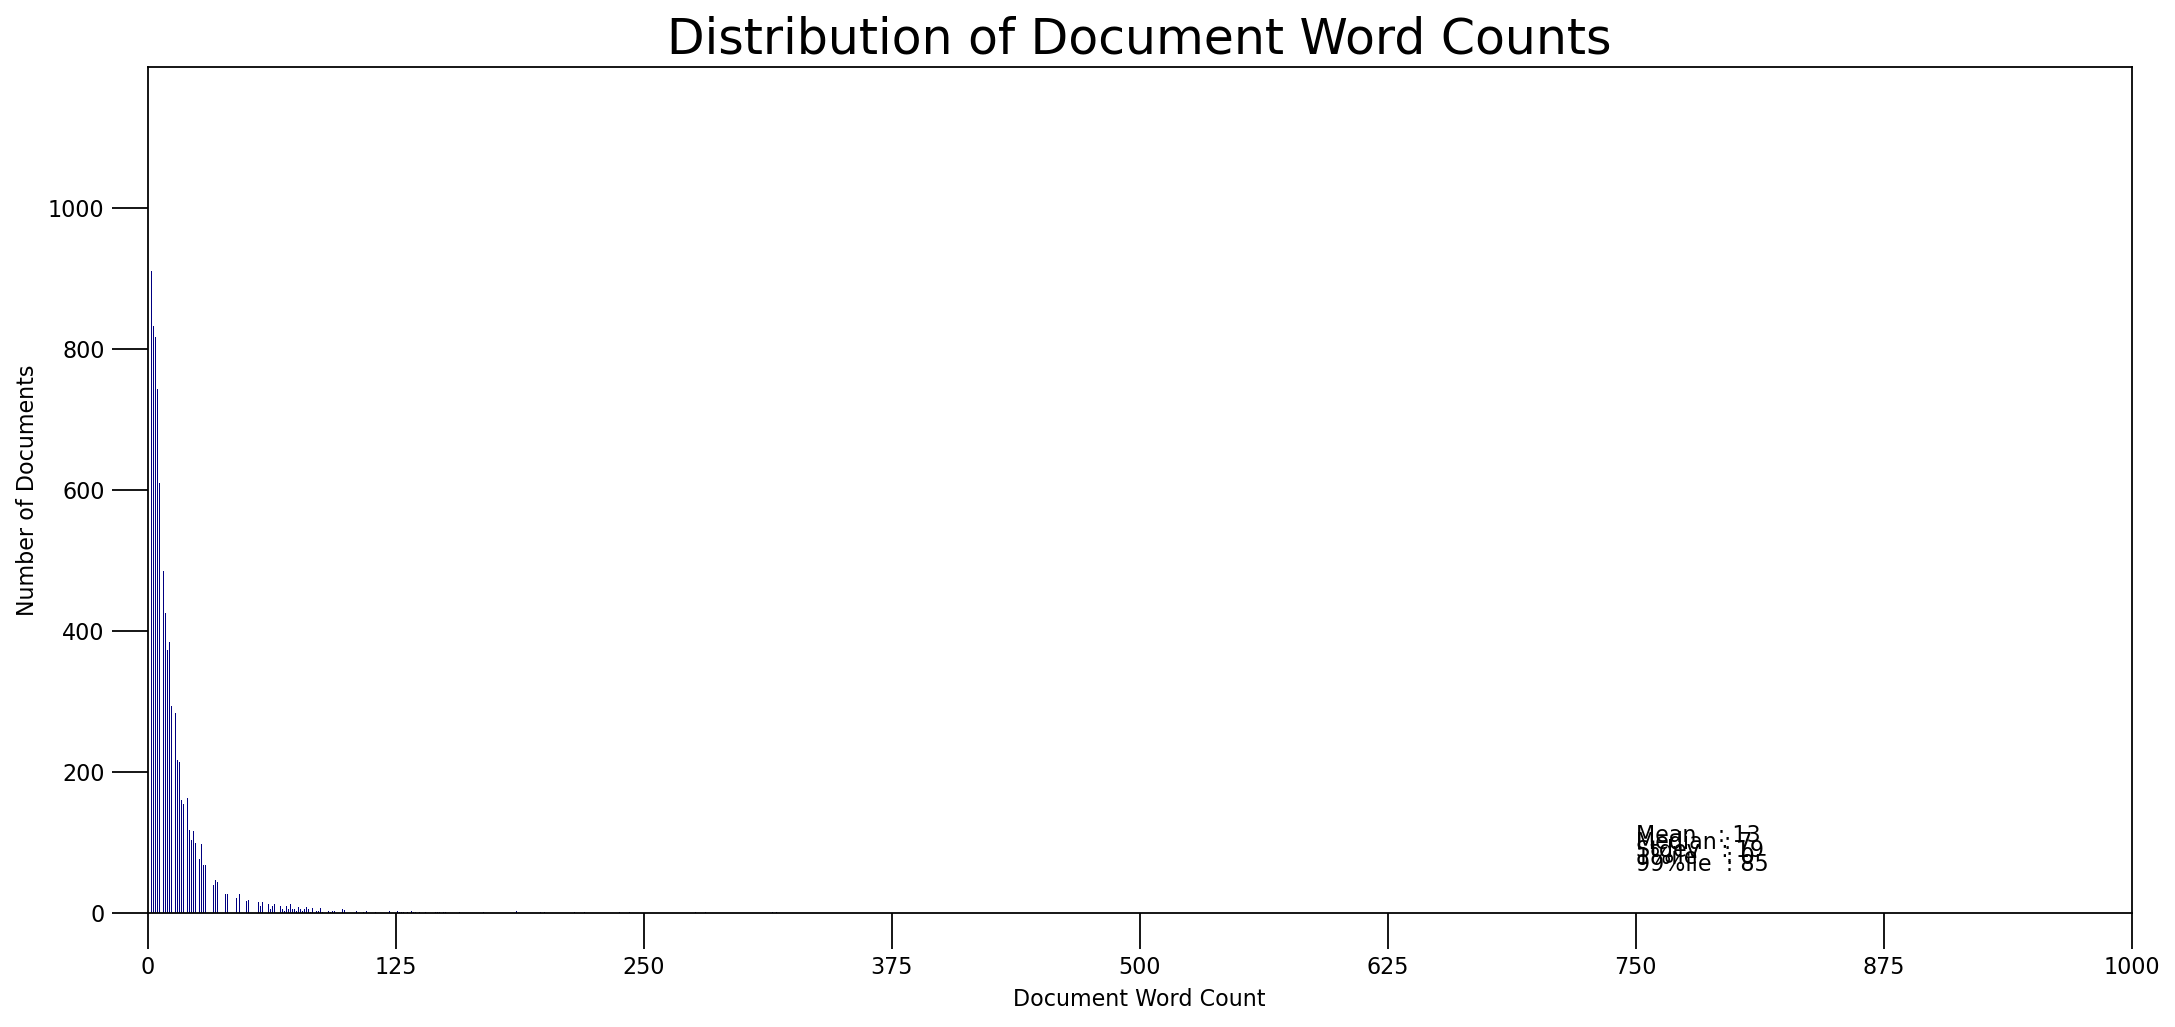

In [32]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.savefig(output_folder_path + "reddit_dist_wordcount.png")
plt.show()

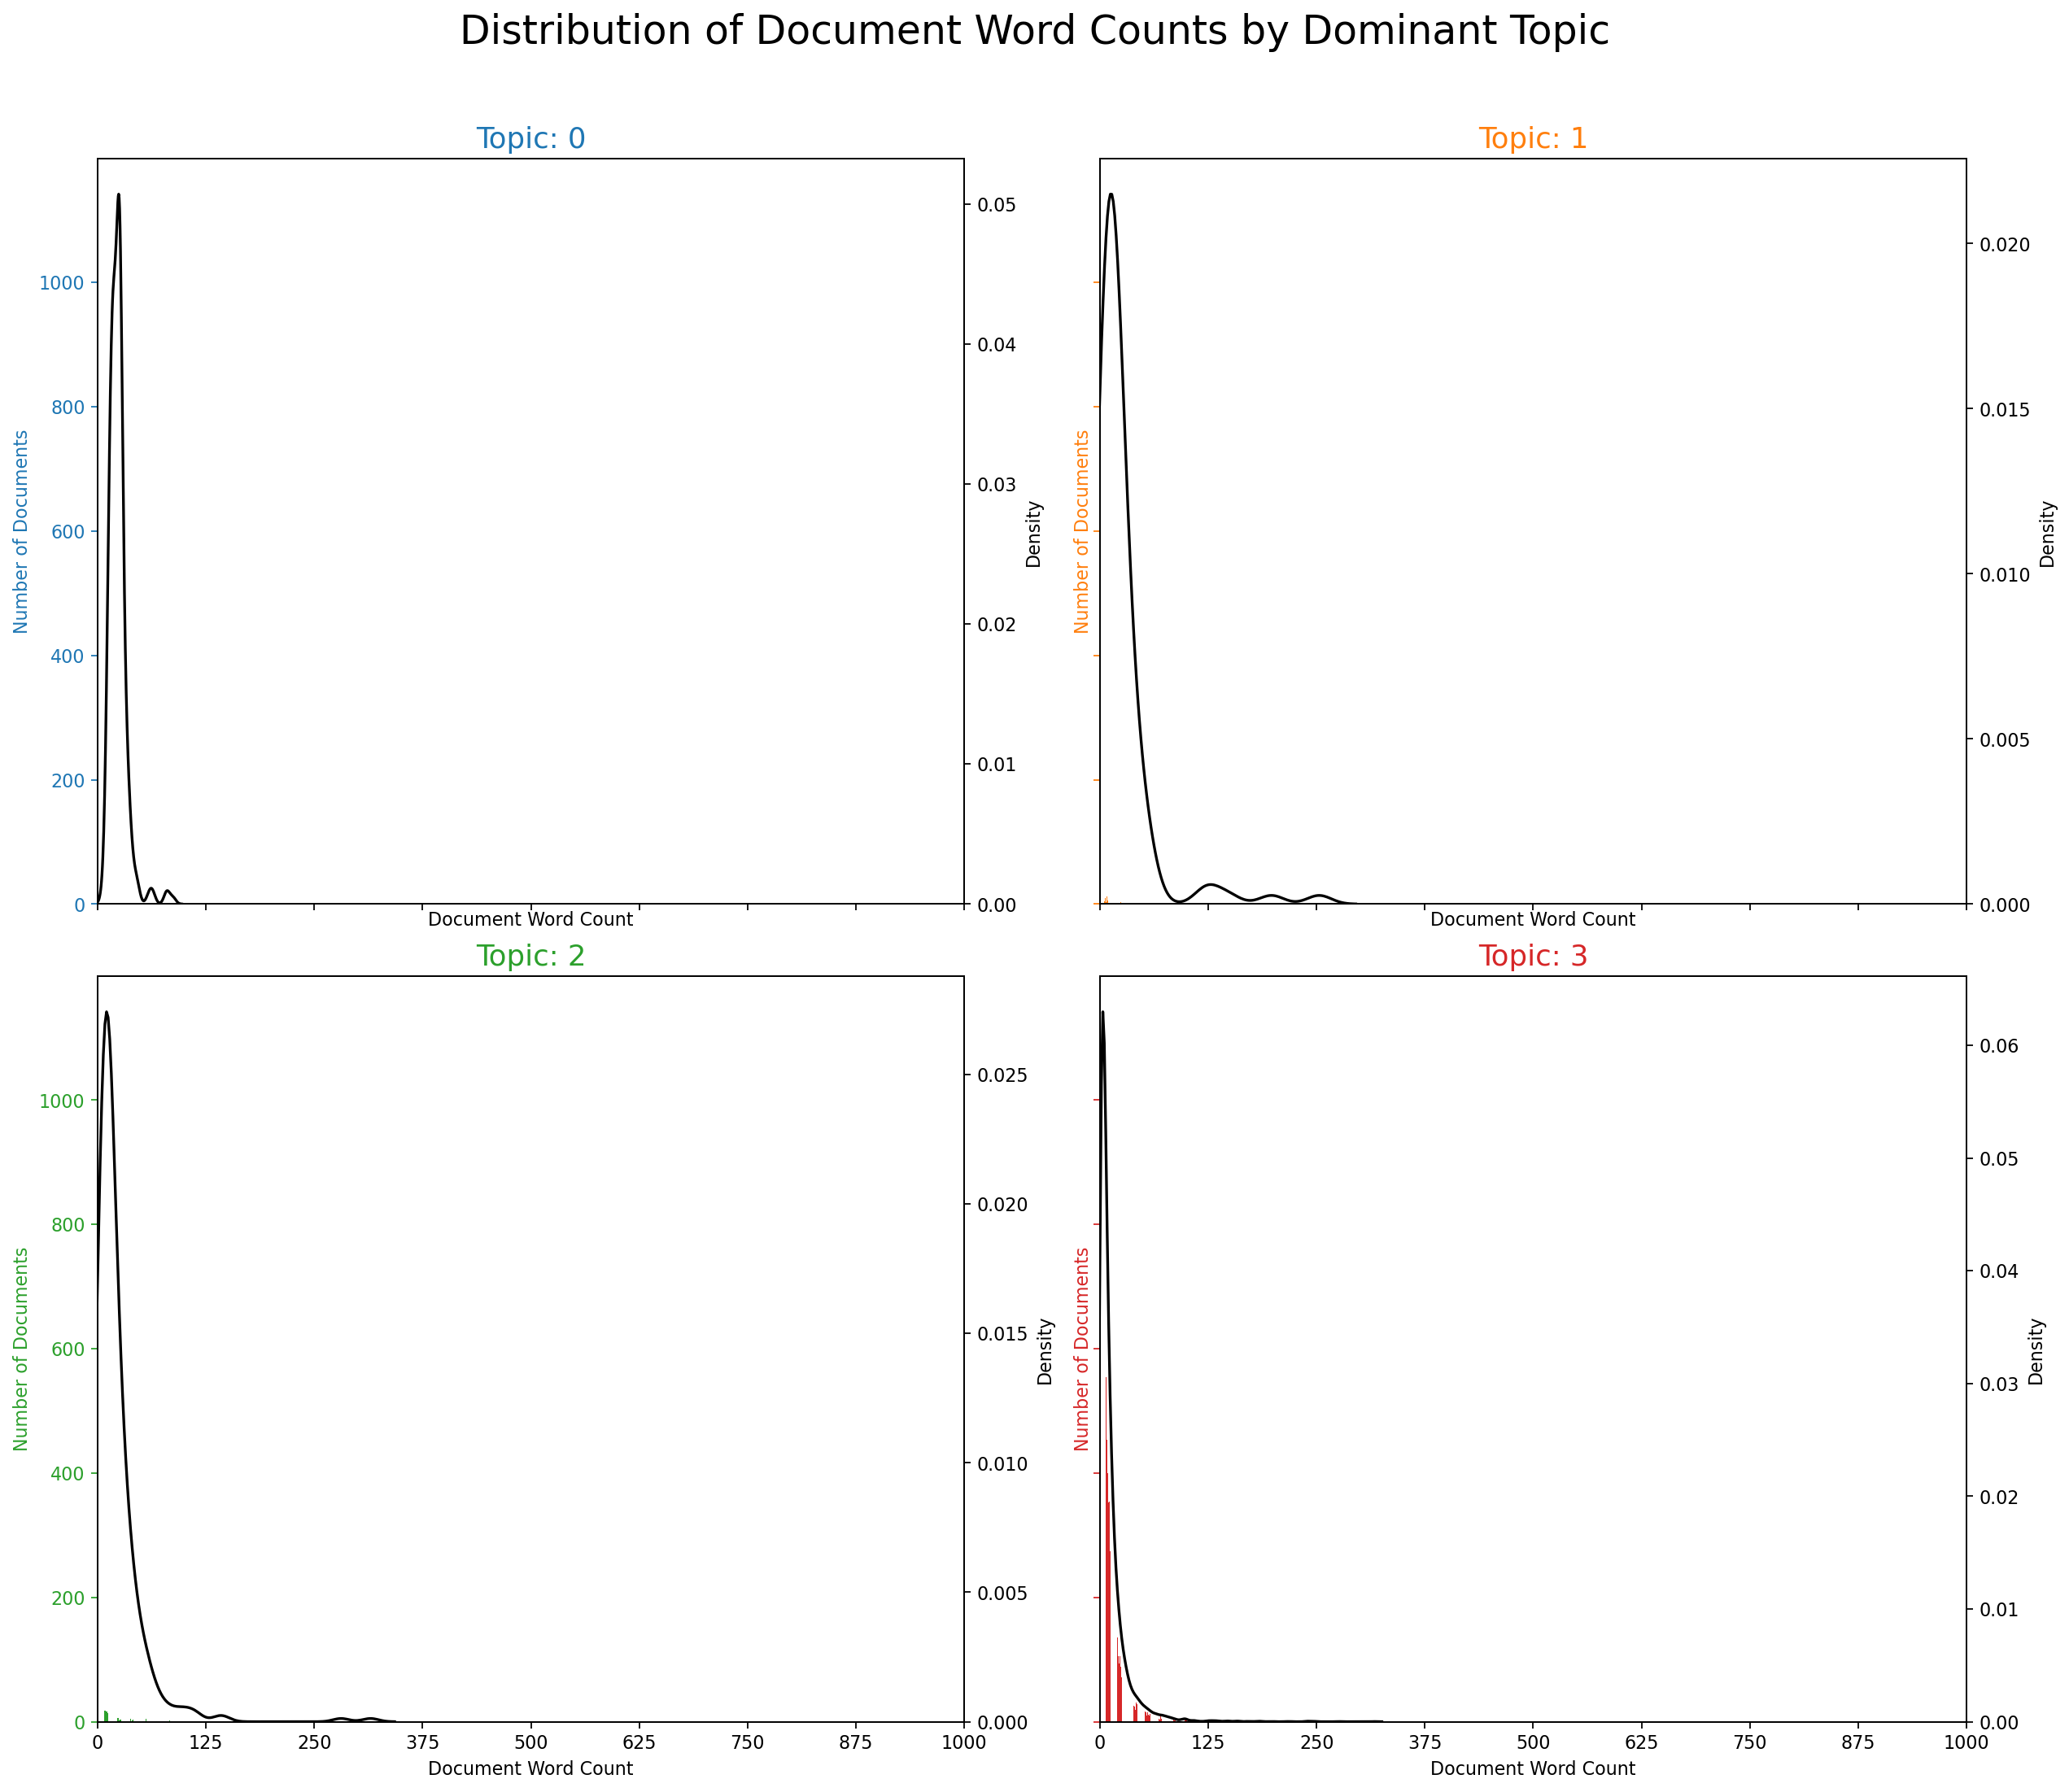

In [33]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.savefig(output_folder_path + "reddit_dist_wordcount_by_topic.png")
plt.show()

<h1>Word Clouds of Top N Keywords in Each Topic</h1>

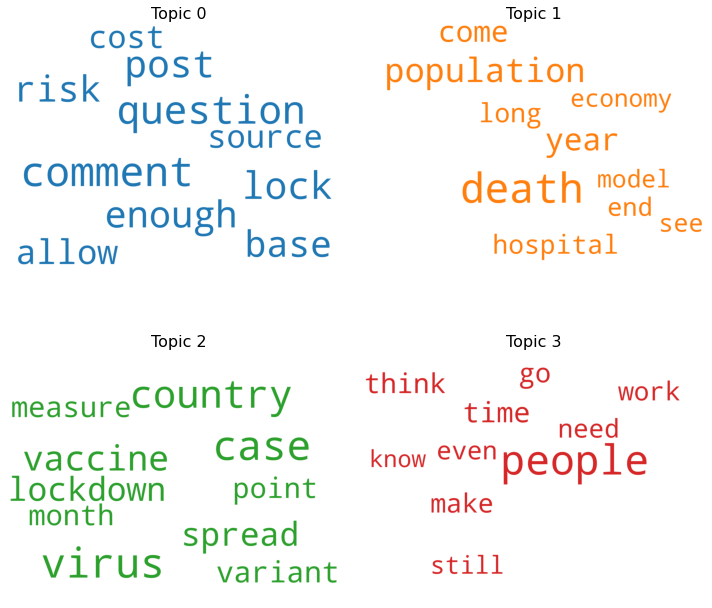

In [34]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig(output_folder_path + "reddit_wordcloud.png")
plt.show()

<h1>Word Counts of Topic Keywords</h1>

C:\Users\Lindy\AppData\Local\Temp/ipykernel_26104/2246158447.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


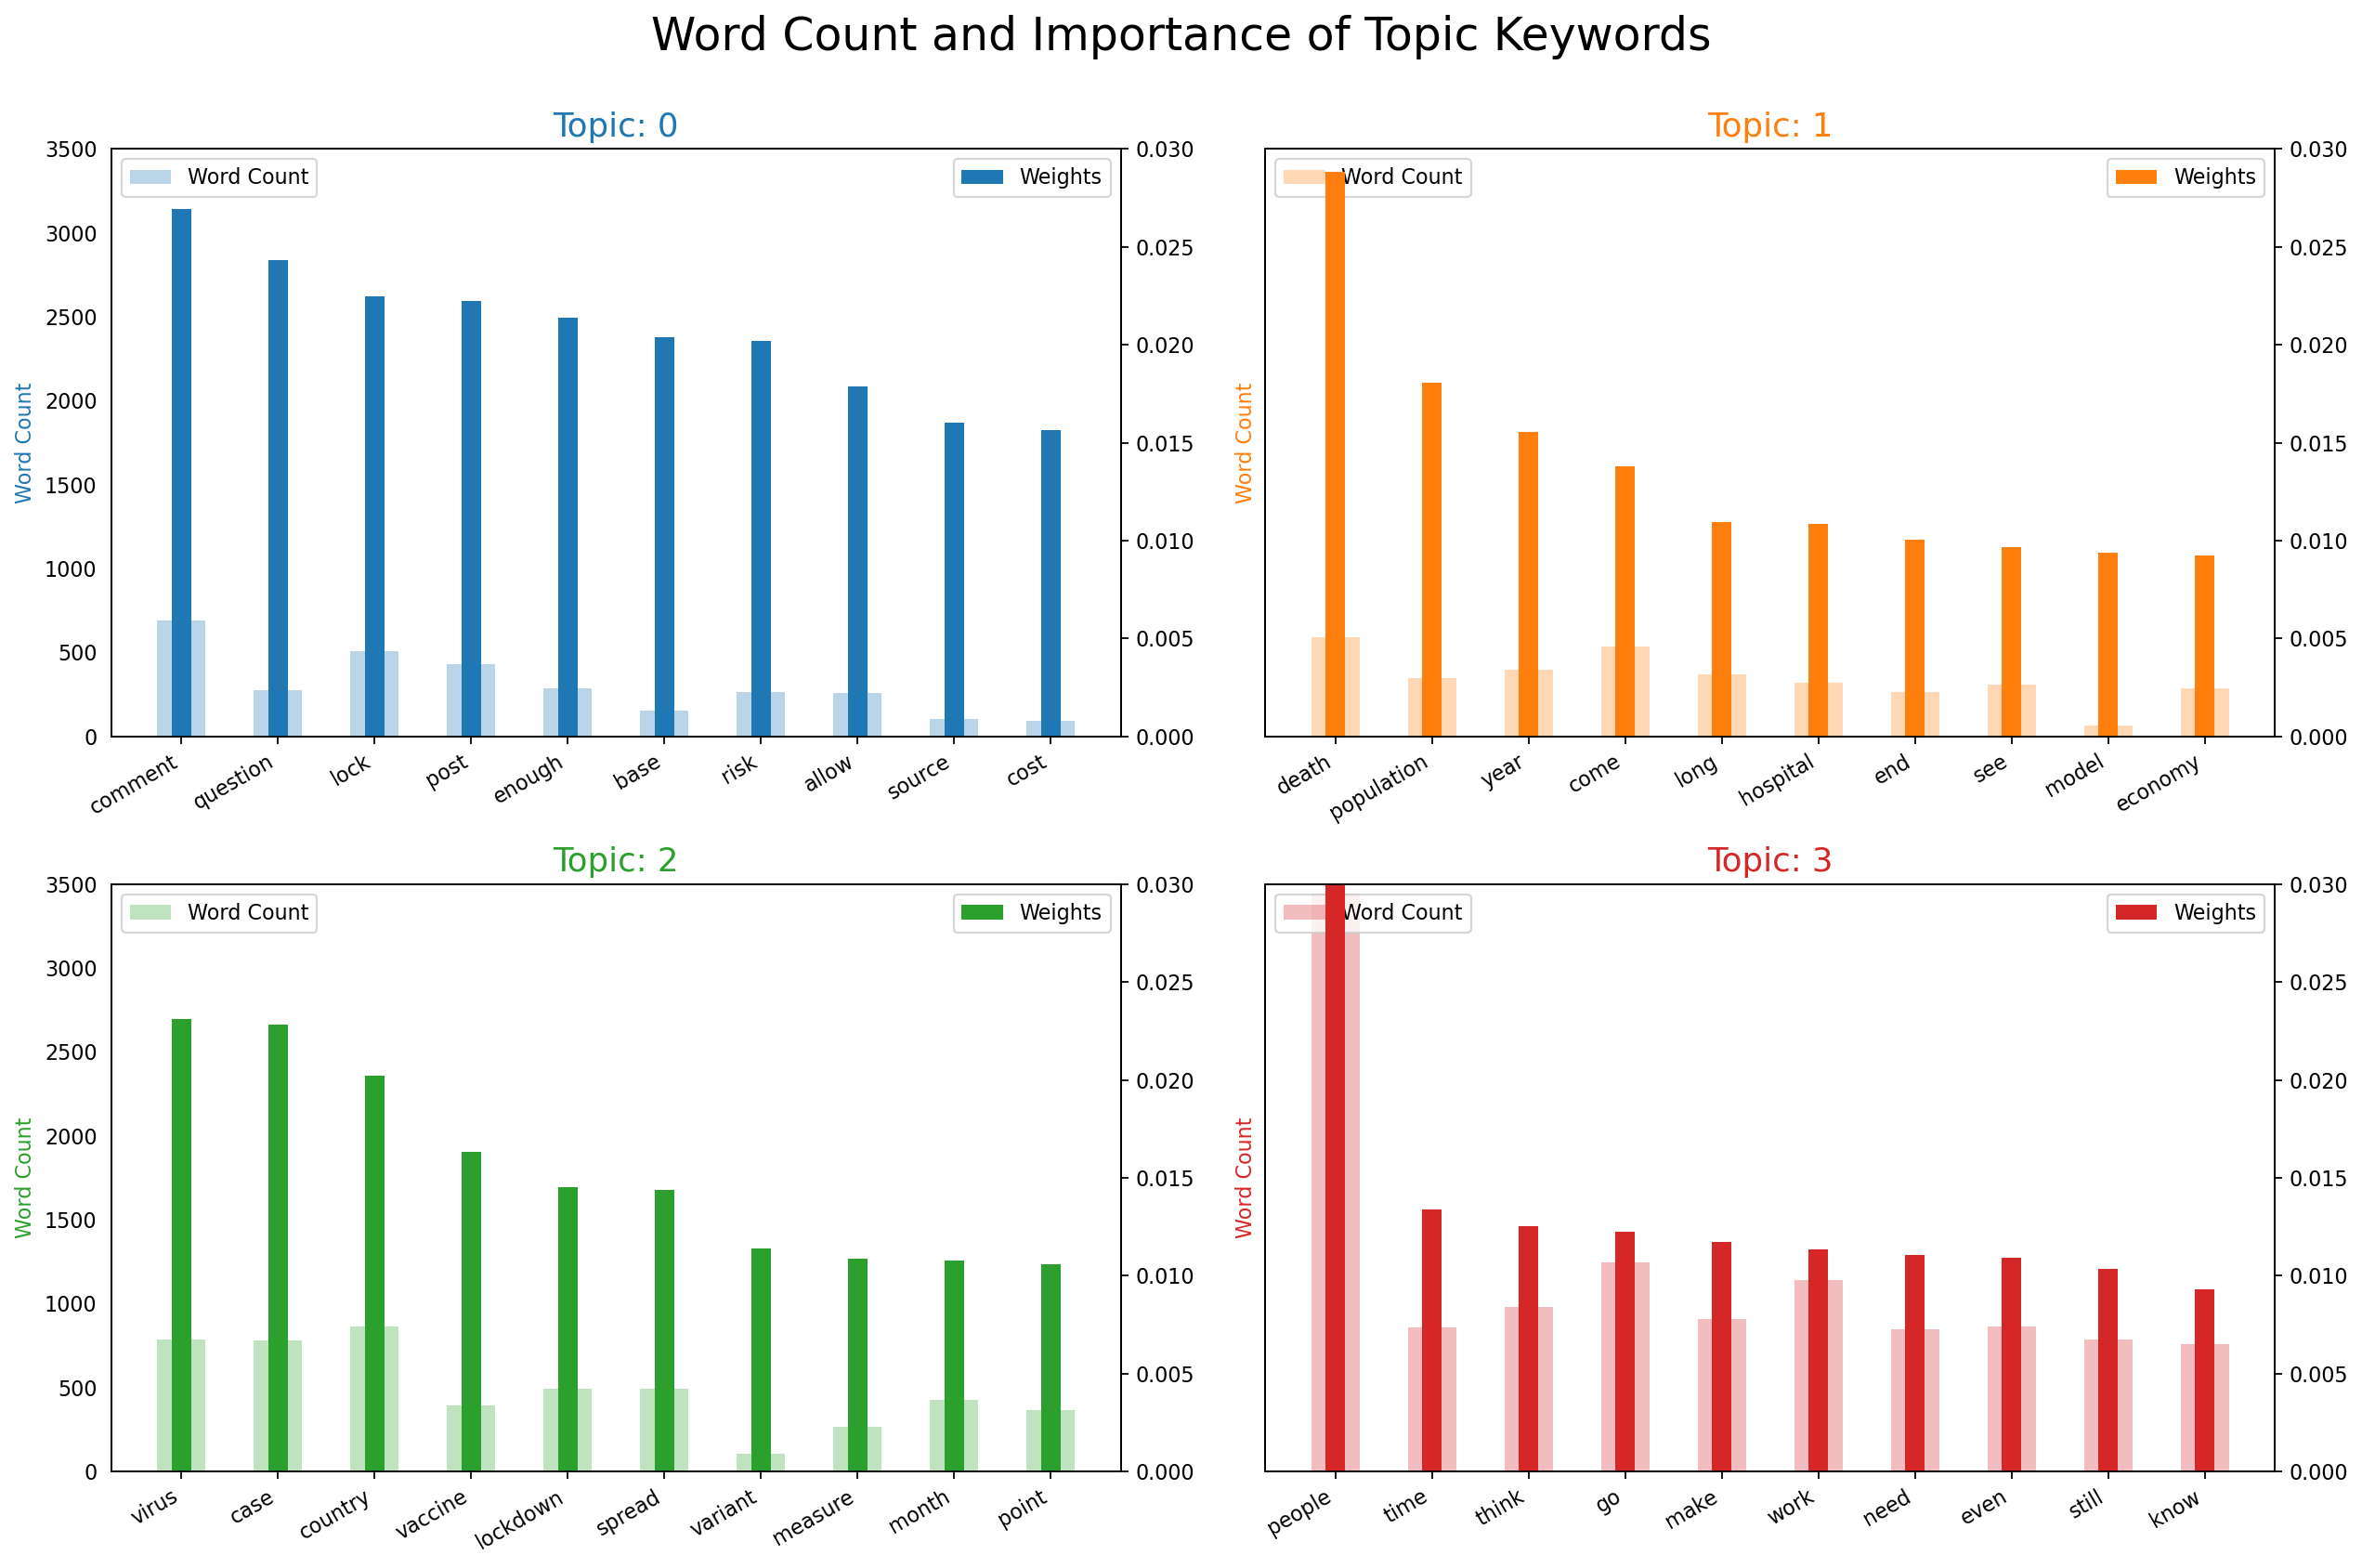

In [35]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.savefig(output_folder_path + "reddit_wordcounts.png")    
plt.show()

<h1>Sentence Chart Colored by Topic</h1>

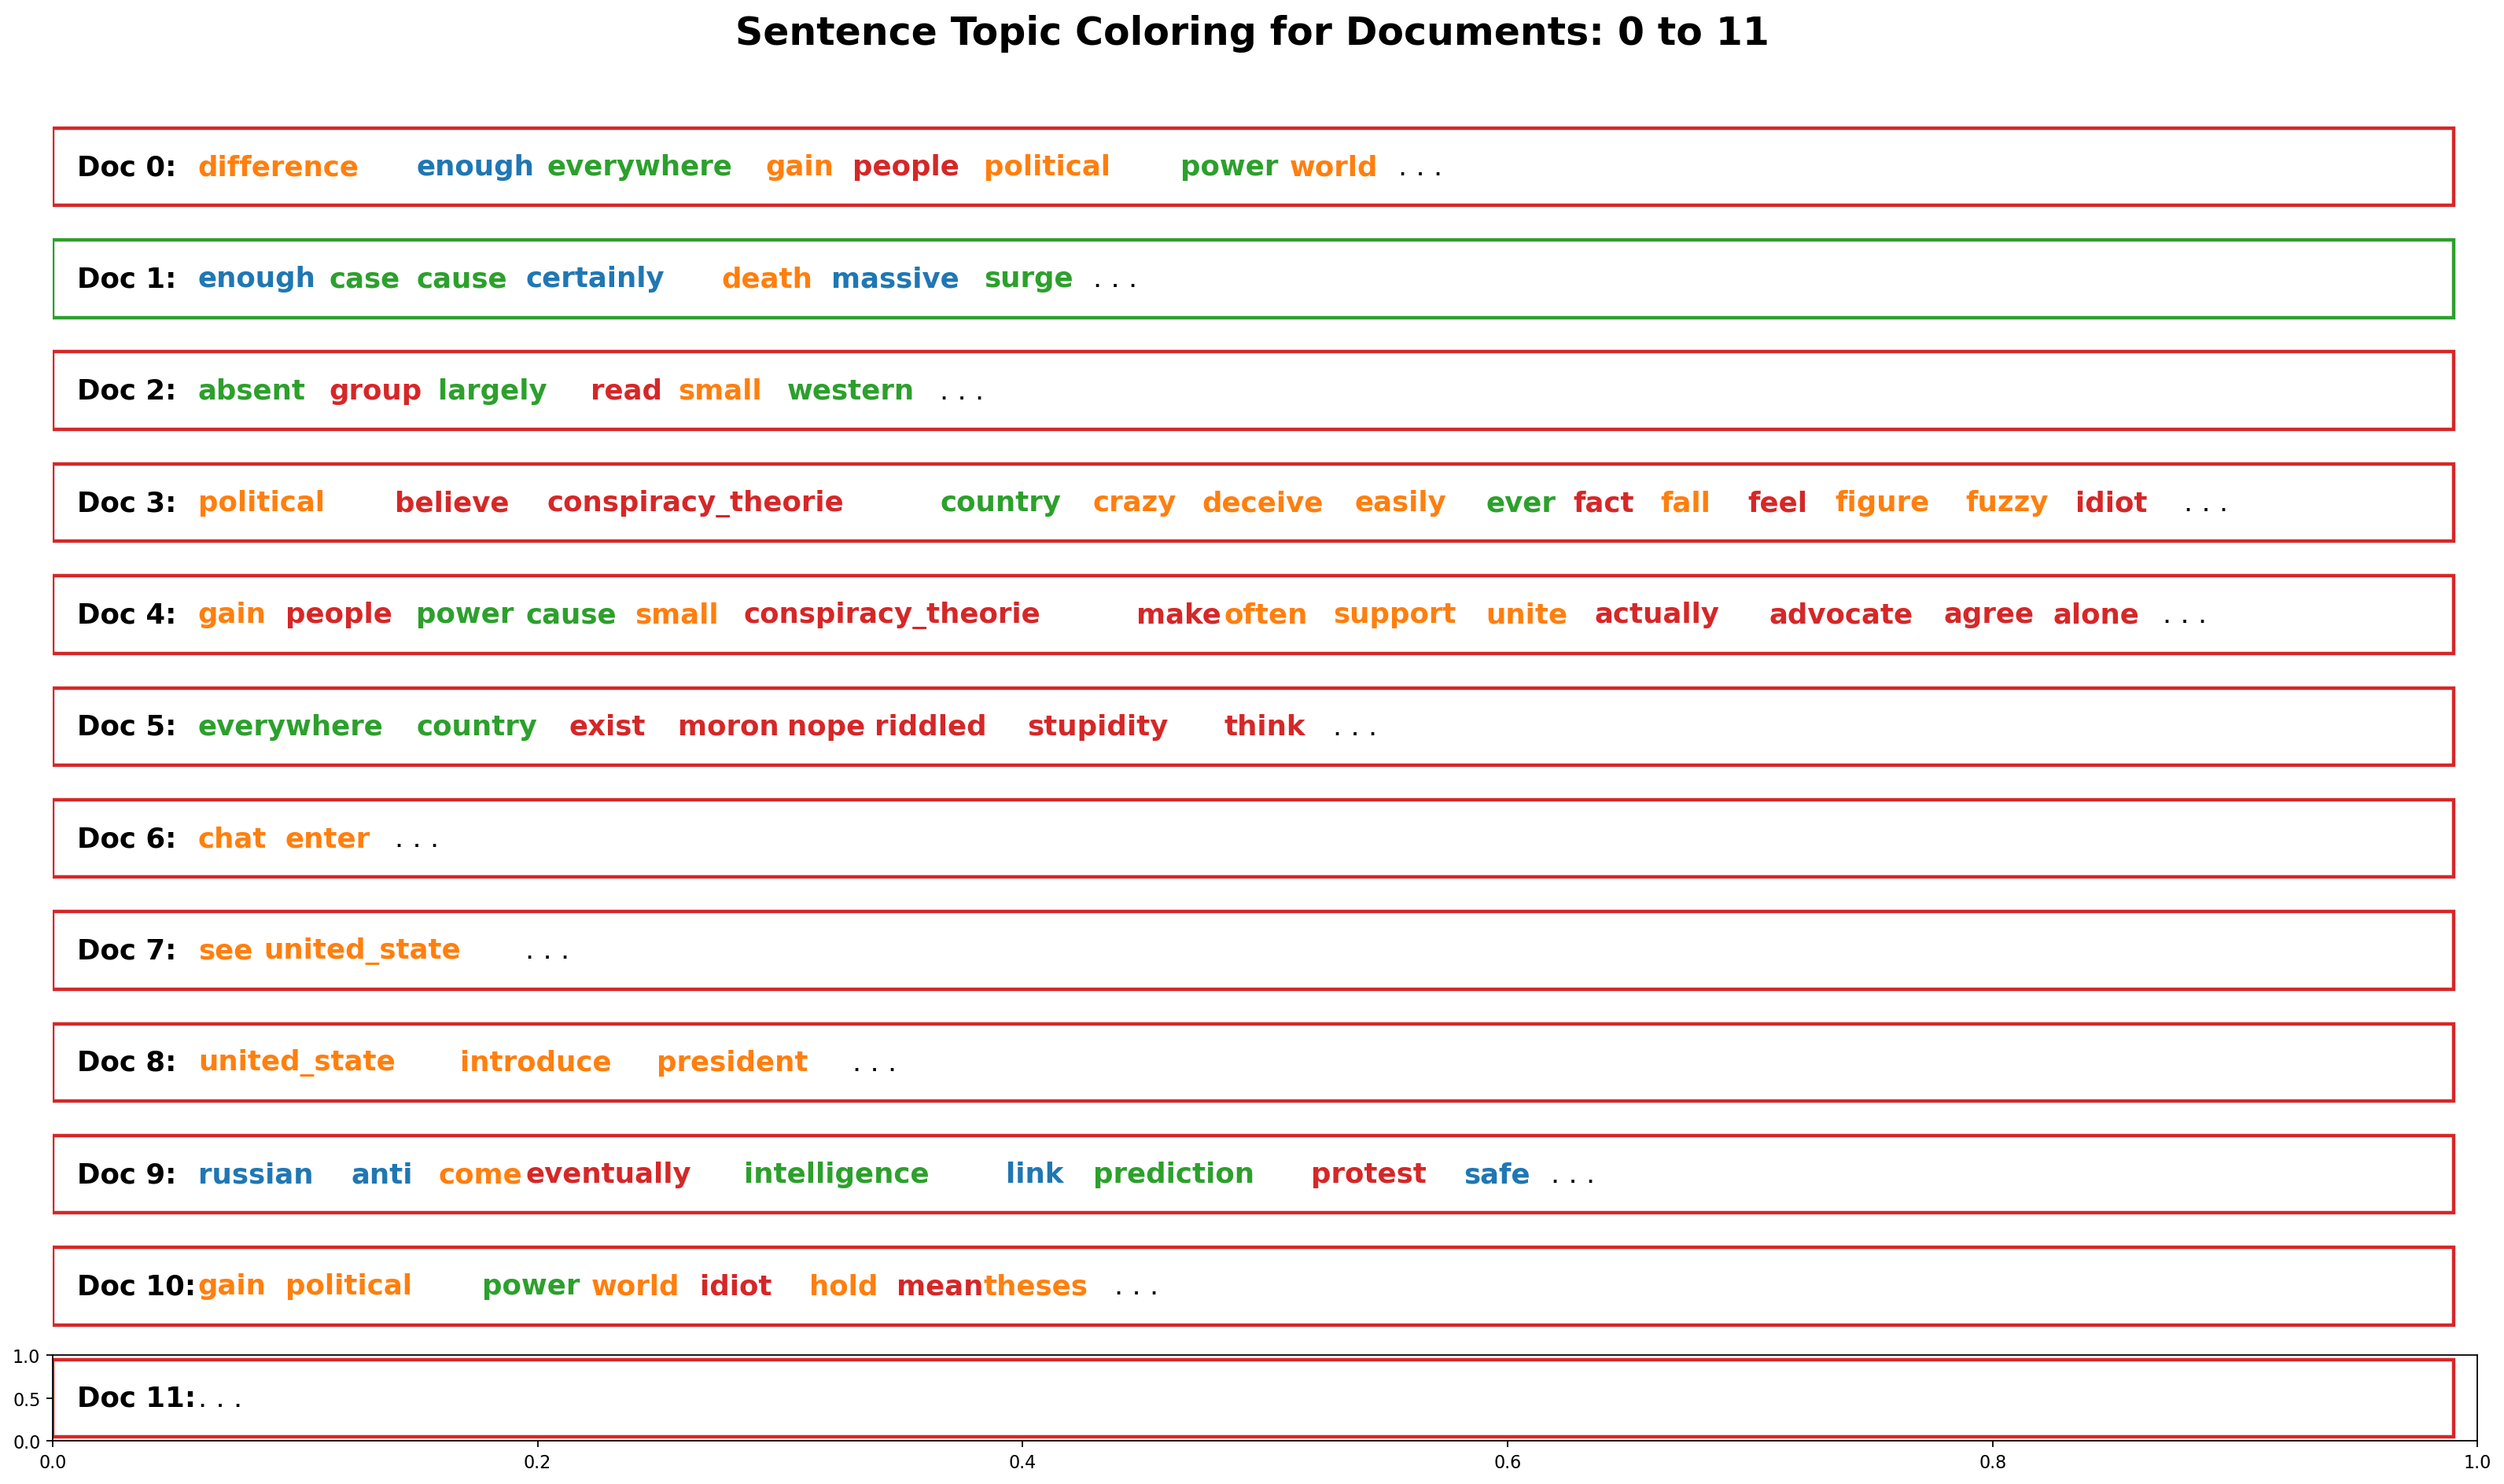

In [36]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

<h1>What are the most discussed topics in the documents?</h1>

In [37]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

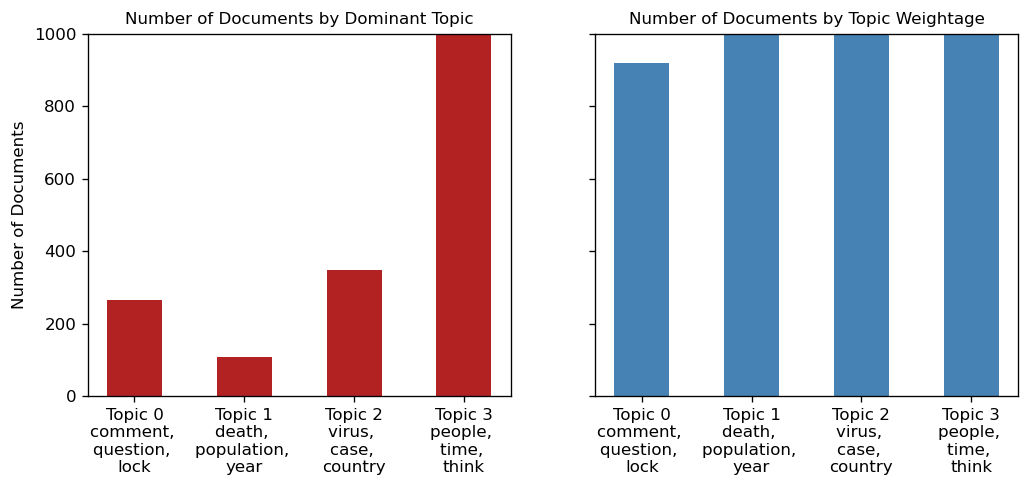

In [38]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.savefig(output_folder_path + "reddit_dominant_topics.png")
plt.show()

<h1>t-SNE Clustering Chart</h1>

In [39]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label

# EXPORTS REQUIRE SELENIUM
from bokeh.io import output_notebook, export_png

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

# export_png(plot, filename="reddit-tsne.png")

show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11472 samples in 0.013s...
[t-SNE] Computed neighbors for 11472 samples in 0.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11472
[t-SNE] Computed conditional probabilities for sample 2000 / 11472
[t-SNE] Computed conditional probabilities for sample 3000 / 11472
[t-SNE] Computed conditional probabilities for sample 4000 / 11472
[t-SNE] Computed conditional probabilities for sample 5000 / 11472
[t-SNE] Computed conditional probabilities for sample 6000 / 11472
[t-SNE] Computed conditional probabilities for sample 7000 / 11472
[t-SNE] Computed conditional probabilities for sample 8000 / 11472
[t-SNE] Computed conditional probabilities for sample 9000 / 11472
[t-SNE] Computed conditional probabilities for sample 10000 / 11472
[t-SNE] Computed conditional probabilities for sample 11000 / 11472
[t-SNE] Computed conditional probabilities for sample 11472 / 11472
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

Loading BokehJS ...

<h1>pyLDAVis</h1>

In [40]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = output_folder_path + "reddit-pyldavis-visprep"

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, output_folder_path + "reddit-pyldavis-overall.html")

LDAvis_prepared

C:\Users\Lindy\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.367434 -0.009620       1        1  49.425116
2     -0.137665 -0.313928       2        1  23.145830
1     -0.138690  0.214520       3        1  19.028149
0     -0.091079  0.109027       4        1   8.400904, topic_info=           Term         Freq        Total Category  logprob  loglift
4        people  2667.000000  2667.000000  Default  30.0000  30.0000
11        death   811.000000   811.000000  Default  29.0000  29.0000
222       virus   791.000000   791.000000  Default  28.0000  28.0000
8          case   781.000000   781.000000  Default  27.0000  27.0000
22      country   703.000000   703.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
532  discussion    84.414165    84.878024   Topic4  -4.9922   2.4714
789    outbreak    96.400025    96.953627   Topic4  -4.8594   2.4711
314    evidence   131.931733   133.160369   Topic4  -4.5456   2.4676
958    specific   106.792991   107.547771   Topic4  -4.7570   2.4698
20      believe   115.933583   274.718845   Topic4  -4.6749   1.6141

[168 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
959       4  0.999822   action
607       4  0.995879    allow
1829      3  0.994614     area
374       4  0.996735  article
1166      3  0.993811    avoid
...     ...       ...      ...
900       1  0.997887     well
258       4  0.997981    whole
127       1  1.000030     work
7         3  0.998907    world
255       3  0.998338     year

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])